Enter value for a1: 0.6
Ax = [6.136592096357756, 1.9317039518211208, 1.9317039518211212, 1.9317039518211212]
1.9317039518211208 1.9317039518211212
obj = 15.795111855463361
1.9217039518211207
1.9217039518211212
0.5005176776695297


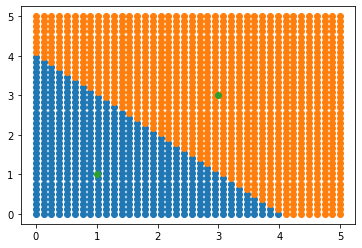

In [1]:
from numpy import *
from pylab import *
import cvxpy as cp
import numpy as np

ep = 0.1

c1 = [1,1] # Prototype A
c2 = [3,3] # Prototype B

a1 = float(input("Enter value for a1: "))
a2 = 1-a1
b1 = a2
b2 = a1

def distA(x,y):
    return sqrt((c1[0]-x)**2+(c1[1]-y)**2)

def distB(x,y):
    return sqrt((c2[0]-x)**2+(c2[1]-y)**2)

d = distA(c2[0],c2[1]) # Distance between c1 and c2

F = a1/(0+ep)+b1/(d+ep)-a2/(0+ep)-b2/(d+ep)-ep**2
G = a2/(d+ep)+b2/(0+ep)-a1/(d+ep)-b1/(0+ep)-ep**2

Crit = 0.5 * (1/(0+ep)-1/(d+ep)+ep**2)/(1/(0+ep)-1/(d+ep))

Ax = [a1/(0+ep)+0+b1/(d+ep)+0,
     a1/(0+ep)-a2/(0+ep)+b1/(d+ep)-b2/(d+ep),
     -a1/(d+ep)+a2/(d+ep)-b1/(0+ep)+b2/(0+ep),
     -a1/(d+ep)+a2/(d+ep)-b1/(0+ep)+b2/(0+ep)]
#Ax = [a1/(0+ep)+a2/(0+ep)-b1/(d+ep)-b2/(d+ep),
#     0-a2/(0+ep)+b1/(d+ep)+b2/(d+ep),
#     a1/(d+ep)+a2/(d+ep)-b1/(0+ep)-b2/(0+ep),
#     0-a2/(d+ep)+b1/(0+ep)+b2/(0+ep)]

s = set(Ax)
Ax_smallest = sorted(s)[0]
Ax_2smallest = sorted(s)[1]

print("Ax =",Ax)
print(Ax_smallest, Ax_2smallest)

obj = 2*a1*(1/(0+ep)-1/(d+ep))+a2*(-1/(0+ep)+2/(d+ep))+2*b1*(1/(d+ep)-1/(0+ep))+b2*(-1/(d+ep)+2/(0+ep))+Ax_smallest+Ax_2smallest
print("obj =",obj)

print(F)
print(G) 
print(Crit)


# Generating list of coordinates on lattice
def lattice_plot(start,stop,num):
    xs = linspace(start,stop,num)
    ys = linspace(start,stop,num)

    ProtoA_x = []
    ProtoA_y = []
    ProtoB_x = []
    ProtoB_y = []

    for i in range(len(xs)):
        for j in range(len(ys)):
            Val1 = a1/(distA(xs[i],ys[j])+0) + b1/(distB(xs[i],ys[j])+0)
            Val2 = a2/(distA(xs[i],ys[j])+0) + b2/(distB(xs[i],ys[j])+0)
            if Val1 > Val2:
                ProtoA_x.append(xs[i])
                ProtoA_y.append(ys[j])
            else:
                ProtoB_x.append(xs[i])
                ProtoB_y.append(ys[j])

    scatter(ProtoA_x,ProtoA_y)
    scatter(ProtoB_x,ProtoB_y)
    scatter([c1[0],c2[0]],[c1[1],c2[1]])
    show()
    
lattice_plot(0,5,40)


